In [1]:
# Import dependencies
import pandas as pd

In [2]:
# Read CSV file
df = pd.read_csv('/Users/meganconnelly/desktop/dataset.csv')
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [3]:
# Check column names
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [4]:
# Check for missing values
df.isna().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

In [5]:
df_data = df.drop_duplicates()
df_data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


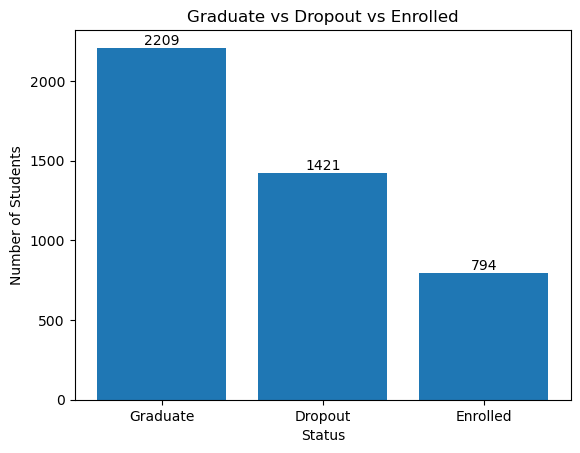

In [6]:
# Comparing Students that Graduate, Dropout and are Enrolled
import matplotlib.pyplot as plt

students = df_data['Target'].value_counts()

plt.bar(students.index, students)
plt.xlabel('Status')
plt.ylabel('Number of Students')
plt.title('Graduate vs Dropout vs Enrolled')

# Add number labels on top of each bar
for i, value in enumerate(students):
    plt.text(i, value, str(value), ha='center', va='bottom')
plt.show()

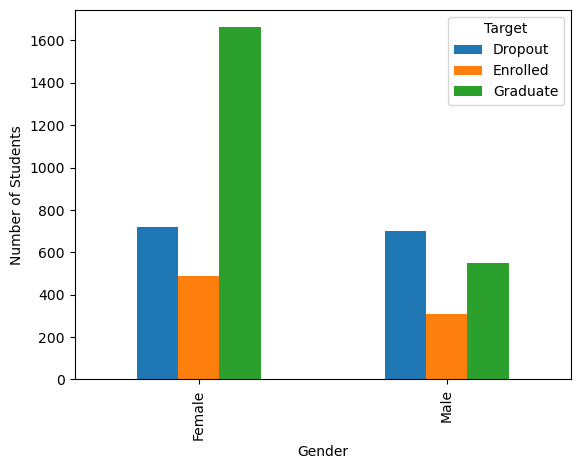

In [9]:
# Comparing dropout, enrolled, and graduate by gender
gender_counts = df_data.groupby(['Gender', 'Target']).size().unstack()

gender_counts.plot(kind='bar', stacked=False)
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])
plt.ylabel('Number of Students')
plt.legend(title='Target')
plt.show()

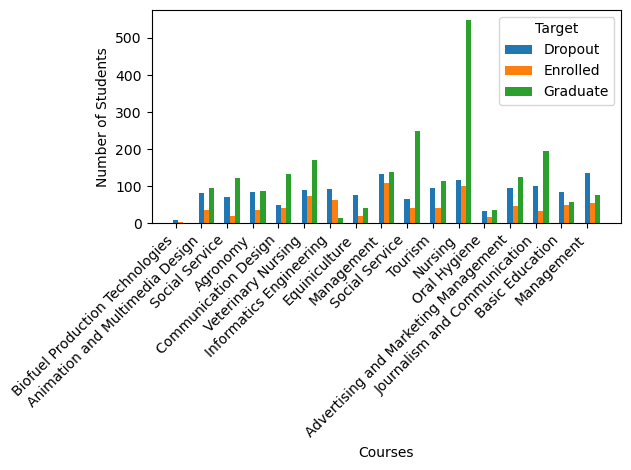

In [16]:
# Comparing courses
course_counts = df_data.groupby(['Course', 'Target']).size().unstack()

fig, ax = plt.subplots()

x = list(range(len(course_counts.index)))
width = 0.2

for i, target in enumerate(course_counts.columns):
    ax.bar([val + (i * width) for val in x], course_counts[target], width=width, label=target)

ax.set_xticks(x)
ax.set_xticklabels(['Biofuel Production Technologies', 'Animation and Multimedia Design', 'Social Service', 'Agronomy', 'Communication Design',
                    'Veterinary Nursing', 'Informatics Engineering', 'Equiniculture', 'Management', 'Social Service', 'Tourism', 'Nursing',
                    'Oral Hygiene', 'Advertising and Marketing Management', 'Journalism and Communication', 'Basic Education', 'Management'],
                   rotation=45, ha='right')
ax.set_xlabel('Courses')
ax.set_ylabel('Number of Students')
ax.legend(title='Target')

plt.tight_layout()
plt.show()

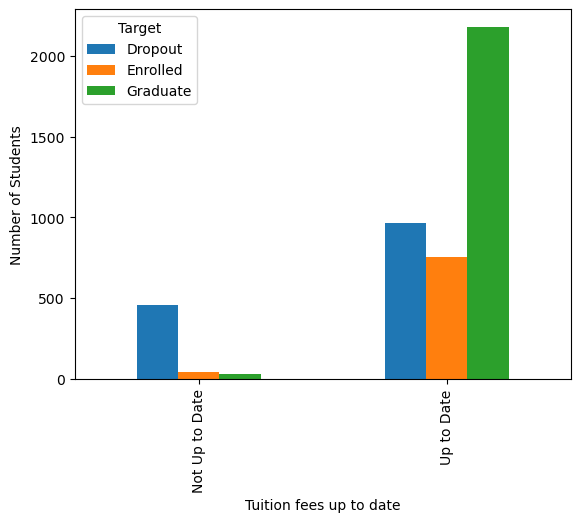

In [17]:
# Tuition Paid vs Unpaid
tuition_counts = df_data.groupby(['Tuition fees up to date', 'Target']).size().unstack()

tuition_counts.plot(kind='bar', stacked=False)
plt.xticks(ticks=[0, 1], labels=['Not Up to Date', 'Up to Date'])
plt.ylabel('Number of Students')
plt.legend(title='Target')
plt.show()

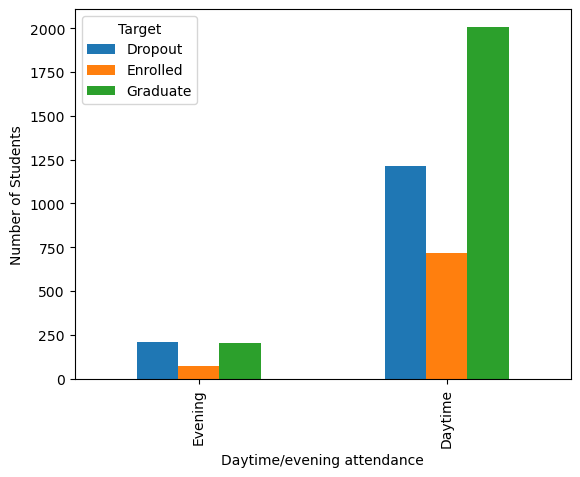

In [18]:
# Daytime vs Evening Attendance
attendance_counts = df_data.groupby(['Daytime/evening attendance', 'Target']).size().unstack()

attendance_counts.plot(kind='bar', stacked=False)
plt.xticks(ticks=[0, 1], labels=['Evening', 'Daytime'])
plt.ylabel('Number of Students')
plt.legend(title='Target')
plt.show()

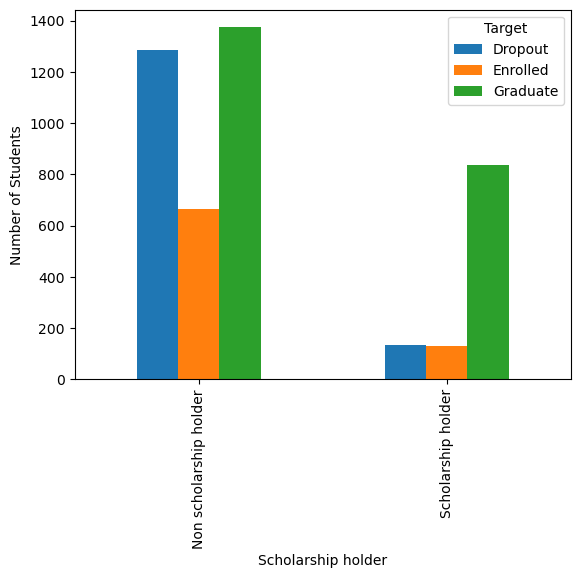

In [19]:
# Scholarship holder
scholarship_counts = df_data.groupby(['Scholarship holder', 'Target']).size().unstack()

scholarship_counts.plot(kind='bar', stacked=False)
plt.xticks(ticks=[0, 1], labels=['Non scholarship holder', 'Scholarship holder'])
plt.ylabel('Number of Students')
plt.legend(title='Target')
plt.show()

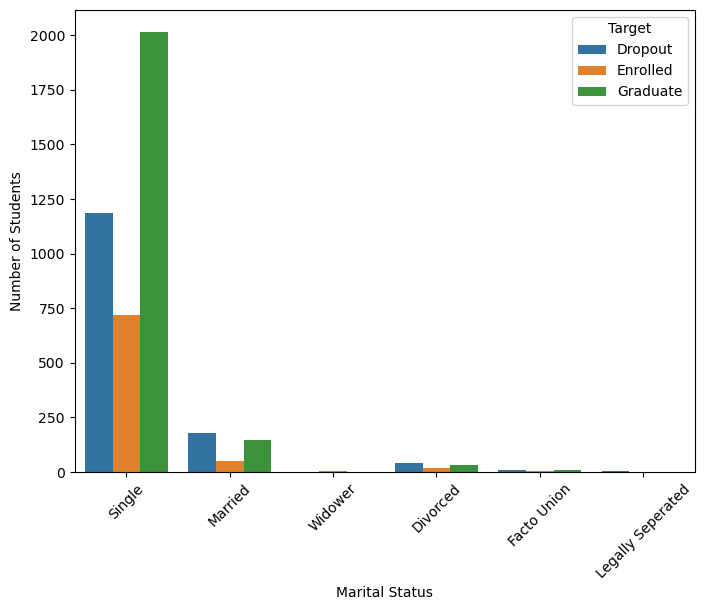

In [40]:
# Marital Status 
plt.figure(figsize=(8,6))

sns.countplot(data=df, x='Marital status', hue='Target', hue_order=['Dropout', 'Enrolled', 'Graduate'])

plt.xticks(ticks=[0,1,2,3,4,5], labels=['Single','Married','Widower','Divorced','Facto Union','Legally Seperated'], rotation=45)
plt.xlabel('Marital Status')
plt.ylabel('Number of Students')
plt.show()

In [30]:
# Splitting the dataset
from sklearn.model_selection import train_test_split

X = df_data.drop('Target', axis=1)
y = df_data['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

/Users/meganconnelly/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [34]:
# Evaluating Performance
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.7559322033898305


Accuracy: 0.7559322033898305
Precision: 0.6821490814741593
Recall: 0.6503964244587493


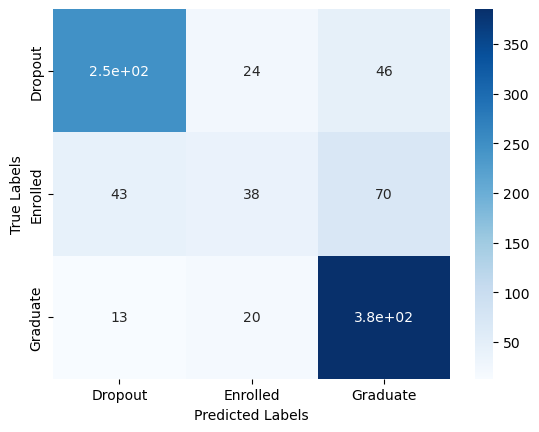

In [41]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix
import numpy as np

# Computing precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

# Computing confusion matrix
unique_labels = np.unique(y_test)
cm = confusion_matrix(y_test, y_pred, labels=unique_labels)

# Printing evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

# Plotting confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues", xticklabels=unique_labels, yticklabels=unique_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()